In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from scipy.signal import savgol_filter

In [2]:
#read data
path="/lustre/ytzheng/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_cold2.6_fxdlhf'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100*.nc',
                      combine = 'by_coords',decode_cf = False)

In [17]:
nt = 90
t_hours = np.arange(nt)

f = f.where(f.CLDLOW > 0.99, drop = True)
f1 = f1.where(f1.CLDLOW > 0.99, drop = True)

myfontsize = 12

In [18]:
# defining a function for axe plotting
def plt2l(iax, ix, iy, iy1, label, smooth):
    if smooth == 0:
        a = iax.plot(np.arange(iy.time.size), iy, label = label)
        iax.plot(np.arange(iy1.time.size), iy1, 
                 linestyle = '--',color =  a[0].get_color())    
    else:
        a = iax.plot(np.arange(iy.time.size), iy, alpha=0.2)
        iax.plot(np.arange(iy1.time.size), iy1, alpha=0.2, 
                 linestyle = '--',color =  a[0].get_color())    
        
        yhat = savgol_filter(iy, 21, 3)
        yhat1 = savgol_filter(iy1, 21, 3)
        
        iax.plot(np.arange(iy.time.size), yhat, label = label, color = a[0].get_color())
        iax.plot(np.arange(iy1.time.size), yhat1, linestyle = '--',color = a[0].get_color())

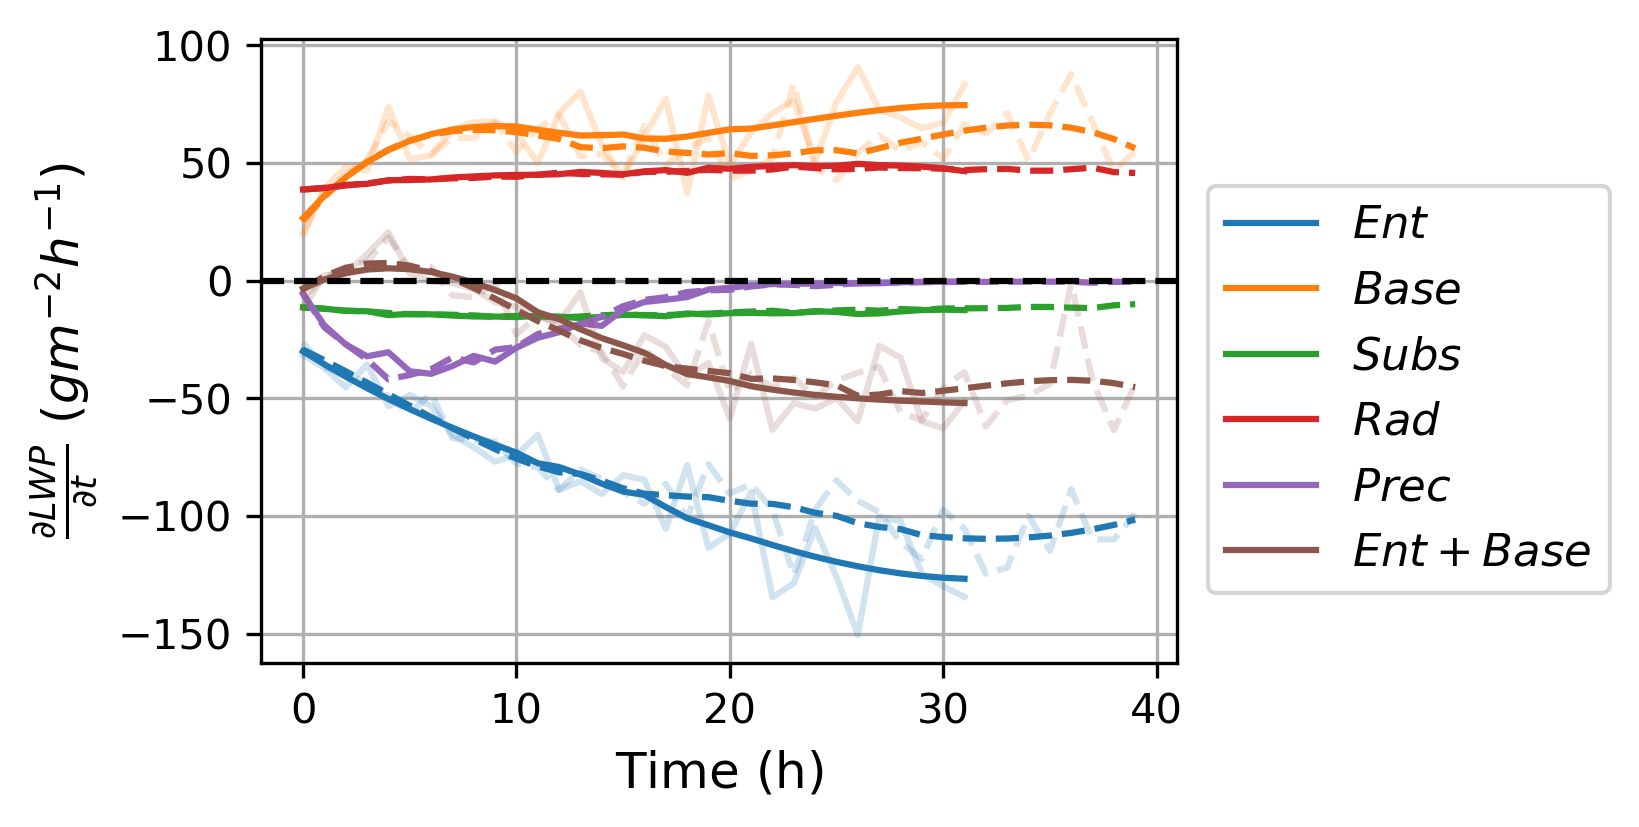

In [29]:
fig, axs = plt.subplots(1,1,figsize=[10/2.54, (7)/2.54], dpi = 300)

plt2l(axs, t_hours, f['Tend_LWP_Ent_out'], f1['Tend_LWP_Ent_out'],
      r"$\mathit{Ent}$", 1)

plt2l(axs, t_hours, f['Tend_LWP_Base_out'], f1['Tend_LWP_Base_out'],
      r"$\mathit{Base}$", 1)

plt2l(axs, t_hours, f['Tend_LWP_Subs_out'], f1['Tend_LWP_Subs_out'],
      r"$\mathit{Subs}$", 0)

plt2l(axs, t_hours, f['Tend_LWP_Rad_out'], f1['Tend_LWP_Rad_out'],
      r"$\mathit{Rad}$", 0)

plt2l(axs, t_hours, f['Tend_LWP_Prec_out'], f1['Tend_LWP_Prec_out'],
      r"$\mathit{Prec}$", 0)

plt2l(axs, t_hours, f['Tend_LWP_Ent_out'] + f['Tend_LWP_Base_out'], 
      f1['Tend_LWP_Ent_out'] + f1['Tend_LWP_Base_out'],
      r"$\mathit{Ent + Base}$", 1)

axs.set_ylabel(r"$\mathit{\frac{\partial LWP}{\partial t} \ (gm^{-2}h^{-1})}$", fontsize=myfontsize)
axs.set_xlabel(r"$\mathrm{Time \ (h)}$", fontsize=myfontsize)
# axs.legend(loc="lower left", fontsize=0.9*myfontsize)
axs.legend(bbox_to_anchor=(1.01, 0.8), ncol=1, fontsize=0.9*myfontsize)

axs.grid(True)
axs.axhline(y=0,linestyle='--',color = 'black')

fig.savefig('Fig11_LWP_budget.png', dpi=fig.dpi, bbox_inches='tight')